
## Universidad de Costa Rica
### Escuela de Ingeniería Eléctrica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---

* Estudiante: **Andrés Bonilla Vega**
* Carné: **B81220**
### Laboratorio 4

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Parte a)

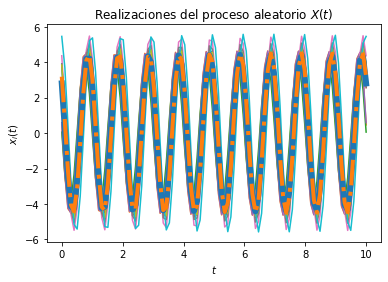

In [3]:
#Se define Omega constante
W = 2*np.pi*100

# Se definen las variables aleatorias A y B
vaA = stats.norm(5, np.sqrt(0.2))
vaB = stats.uniform(0, np.pi/2)

# Se define el vector tiempo
T = 100			# número de elementos
t_final = 10	# tiempo en segundos
t = np.linspace(0, t_final, T)

# Se inicia el proceso aleatorio X(t) con N realizaciones
N = 10
X_t = np.empty((N, len(t)))	# N funciones del tiempo x(t) con la cantidad T definida

# Se crean las muestras del proceso 
for i in range(N):
	C = vaA.rvs()
	Z = vaB.rvs()
	x_t = C * np.cos(W*t + Z)
	X_t[i,:] = x_t
	plt.plot(t, x_t)

# Promedio de las N realizaciones en cada instante
P = [np.mean(X_t[:,i]) for i in range(len(t))]
plt.plot(t, P, lw=6)

# Graficar el resultado teórico del valor esperado
E = 10/np.pi *( np.cos(W*t) - np.sin(W*t))
plt.plot(t, E, '-.', lw=4)

# Mostrar las realizaciones, y su promedio calculado y teórico
plt.title('Realizaciones del proceso aleatorio $X(t)$')
plt.xlabel('$t$')
plt.ylabel('$x_i(t)$')
plt.show()

### Parte b)

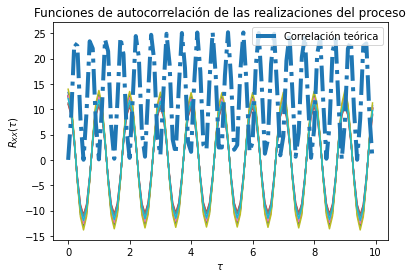

In [5]:
#con Omega  y Theta constante		  
Theta = np.pi/2		       
	       
# Se define el inicio de  X(t) con N realizaciones
	       
X_t2 = np.empty((N, len(t)))	# cantidad N de funciones del tiempo x(t) 

for i in range(N):
	C2 = vaA.rvs()
	x_t2 = C2 * np.cos(W*t + Theta)
	X_t2[i,:] = x_t2	       

# Promedio de las N realizaciones en cada instante 
P2 = [np.mean(X_t2[:,i]) for i in range(len(t))]
	       
# Cantiodad de T valores de desplazamiento tau
desplazamiento2 = np.arange(T)
taus2 = desplazamiento2/t_final	       


# Se define el inicio de la matriz de valores de correlación para las N funciones
corr2 = np.empty((N, len(desplazamiento2)))

# Nueva figura para la autocorrelación
plt.figure()

# Cálculo de correlación para cada valor de tau
for n in range(N):
	for i, tau in enumerate(desplazamiento2):
		corr2[n, i] = np.correlate(X_t2[n,:], np.roll(X_t2[n,:], tau))/T
	plt.plot(taus2, corr2[n,:])

# Valor teórico de correlación
Rxx2 = 25.2 * np.cos(W*t+Theta)*np.cos(W*(t+taus2)+Theta)

# Gráficas de correlación para cada realización y la
plt.plot(taus2, Rxx2, '-.', lw=4, label='Correlación teórica')
plt.title('Funciones de autocorrelación de las realizaciones del proceso')
plt.xlabel(r'$\tau$')
plt.ylabel(r'$R_{XX}(\tau)$')
plt.legend()
plt.show()  	